# RESTAURANT BUSINESS RANKING 2020

## INTRODUCTION

**1. THE FUTURE 50**

> The Future 50 is a measure of the fastest-growing restaurant concepts with annual sales between 20 million and 50 million. Data is compiled by Technomic. Rankings are based on percent change in systemwide sales from 2018 to 2019; chains must have also opened new units in 2019 to qualify. Unit counts are as of Dec. 31, 2019. When data was not provided, Technomic estimated sales based on public information, comparable concepts, market and other factors.

**2. TOP 100 INDEPENDENTS**

> RB’s Top 100 Independents ranking is a measure of the highest-grossing independent restaurants. Only restaurant concepts with no more than five locations are considered “independents” for the purpose of this list (although it’s possible a restaurant that shares a name with a chain but is owned and operated separately would qualify, such as Smith & Wollensky in New York City). Rankings are based on gross 2019 food and beverage sales. Information was gathered through surveys. When data wasn’t provided, sales were estimated based on public information, similar concepts and other factors.

**3. TOP 250**

> The Top 500 Chain Restaurant Report is a measure of the largest restaurant concepts by U.S. systemwide sales, based on results from the 2019 calendar year. Relevant information is accrued using a combination of public company financial filings, direct operator surveying, franchise disclosure documents and proprietary valuation algorithms. Technomic Inc. believes that its sources of information are reliable but does not assume any liability for the accuracy or comprehensiveness of the information published.


Future 50: https://www.restaurantbusinessonline.com/future-50-2020 <br>
Independence 100: https://www.restaurantbusinessonline.com/top-100-independents-2020  <br>
Top 250: https://www.restaurantbusinessonline.com/top-500-2020

## 1. IMPORTING AND PREPARING THE DATA

In [1]:
# Import the libraries
library(tidyverse)
library(PerformanceAnalytics)
library(summarytools)
library(gridExtra)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'xts'


The following objects are masked from 'package:dplyr':

    first, last



Attaching package: 'PerformanceAnalytics'


The following object is masked from 'package:graphics':

    legend


Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp

For best results, restart R session and update pander using devtools:: or remotes::install_github('rapporter/pander')


Attaching package:

In [2]:
# Read the datas
df_future50<- read.csv("Future50.csv", header=T,sep=",", dec=".")
df_independence100<-read.csv("Independence100.csv", header=T,sep=",", dec=".")
df_top250<-read.csv("Top250.csv", header=T,sep=",", dec=".")

## 2. FUTURE 50

In [3]:
# Summary of data
summary(df_future50)

      Rank        Restaurant          Location             Sales      
 Min.   : 1.00   Length:50          Length:50          Min.   :20.00  
 1st Qu.:13.25   Class :character   Class :character   1st Qu.:24.25  
 Median :25.50   Mode  :character   Mode  :character   Median :34.50  
 Mean   :25.50                                         Mean   :33.78  
 3rd Qu.:37.75                                         3rd Qu.:42.00  
 Max.   :50.00                                         Max.   :49.00  
  YOY_Sales             Units        YOY_Units          Unit_Volume    
 Length:50          Min.   :  7.0   Length:50          Min.   : 465.0  
 Class :character   1st Qu.: 16.0   Class :character   1st Qu.: 867.5  
 Mode  :character   Median : 27.0   Mode  :character   Median :1260.0  
                    Mean   : 34.7                      Mean   :1592.6  
                    3rd Qu.: 45.5                      3rd Qu.:2020.0  
                    Max.   :105.0                      Max.   :4300.0  

In [4]:
# View the first six lines of dataset
head(df_future50)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>
1,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
2,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
3,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
4,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
5,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
6,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes


In [5]:
# View the last six lines of dataset
tail(df_future50)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>
45,45,Pita Mediterranean Street Food,"Fairburn, Ga.",38,17.8%,32,10.3%,1260,Yes
46,46,LA Crawfish,"McAllen, Texas",48,17.6%,25,13.6%,2050,Yes
47,47,&pizza,"Washington, D.C.",45,17.1%,35,9.4%,1350,No
48,48,Super Duper Burgers,"San Francisco, Calif.",39,16.9%,16,14.3%,2630,No
49,49,StoneFire Grill,"Agoura Hills, Calif.",31,16.0%,13,8.3%,2550,No
50,50,Gus's World Famous Fried Chicken,"Memphis, Tenn.",44,14.4%,28,7.7%,1600,Yes


In [6]:
# Transform variables
df_future50$Restaurant<- factor(df_future50$Restaurant)
df_future50$Location<- factor(df_future50$Location)
df_future50$Franchising <- factor(df_future50$Franchising )
df_future50$YOY_Sales<-as.numeric(str_sub(df_future50$YOY_Sales, end=-2))
df_future50$YOY_Units<-as.numeric(str_sub(df_future50$YOY_Units, end=-2))

In [7]:
# Glimpse the data
glimpse(df_future50)

Rows: 50
Columns: 9
$ Rank        <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, ...
$ Restaurant  <fct> Evergreens, Clean Juice, Slapfish, Clean Eatz, Pokework...
$ Location    <fct> "Seattle, Wash.", "Charlotte, N.C.", "Huntington Beach,...
$ Sales       <int> 24, 44, 21, 25, 49, 39, 24, 20, 24, 29, 30, 39, 41, 48,...
$ YOY_Sales   <dbl> 130.5, 121.9, 81.0, 79.7, 77.1, 62.9, 52.5, 39.6, 36.8,...
$ Units       <int> 26, 105, 21, 46, 50, 76, 36, 19, 60, 17, 41, 50, 63, 48...
$ YOY_Units   <dbl> 116.7, 94.4, 90.9, 58.6, 56.3, 28.8, 33.3, 35.7, 27.7, ...
$ Unit_Volume <int> 1150, 560, 1370, 685, 1210, 580, 775, 1260, 465, 1930, ...
$ Franchising <fct> No, Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, No, Yes, Ye...


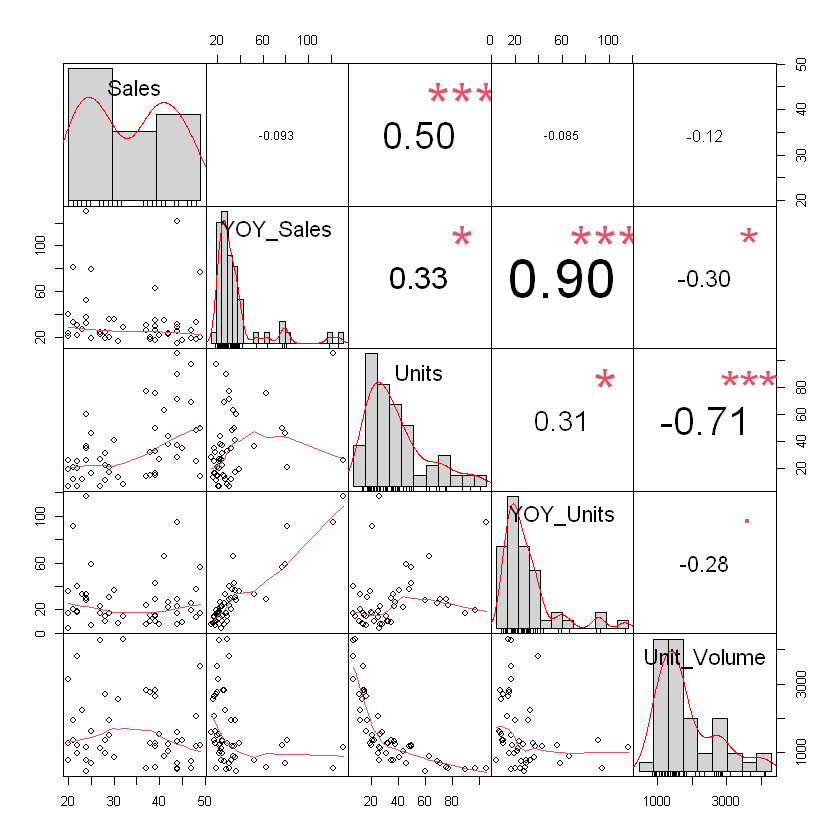

In [8]:
# Visualization of Correlation Matrix
df_future50 %>%
select(Sales,YOY_Sales,Units,YOY_Units,Unit_Volume) %>%
chart.Correlation()

In [9]:
# Plot Sales Histogram
graph1<-df_future50 %>%
ggplot(aes(Sales)) +
geom_histogram(fill = "green", color = "blue", size=1,alpha = 0.5, bins = 40, boundary = 5) +
geom_density(aes(y = ..count..), color="red", size=1) +
labs(title = "Sales", x=NULL, y=NULL) +
theme(axis.text.x = element_text(size = 14),
     axis.text.y = element_text(size = 14))

In [10]:
# Plot Units Histogram
graph2<-df_future50 %>%
ggplot(aes(Units)) +
geom_histogram(fill = "green", color = "red", size=1, alpha = 0.5, bins = 40, boundary = 5) +
geom_density(aes(y = ..count..), color="blue", size=1) +
labs(title = "Units", x=NULL, y=NULL) +
theme(axis.text.x = element_text(size = 14),
     axis.text.y = element_text(size = 14))

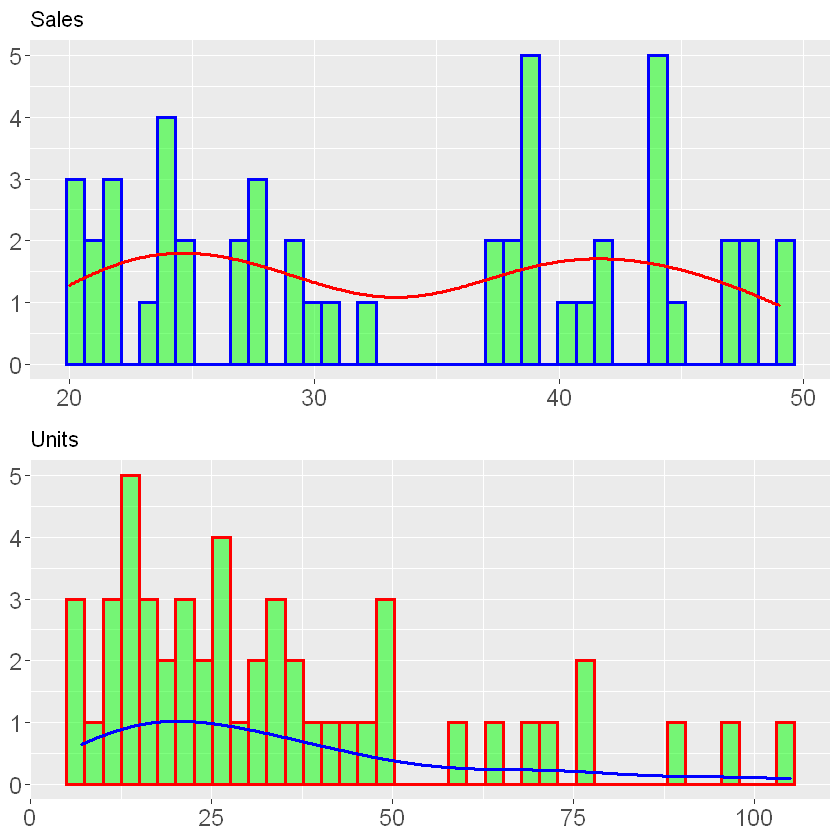

In [11]:
grid.arrange(graph1, graph2)

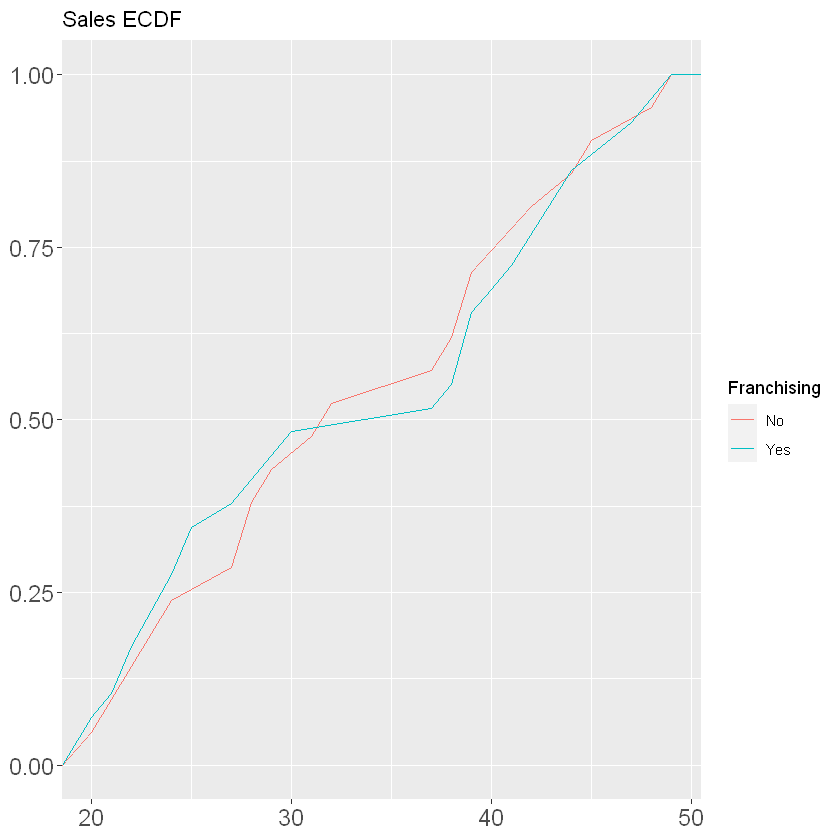

In [12]:
# Plot Sales ECDF
df_future50 %>%
ggplot(aes(Sales, colour=Franchising)) + 
stat_ecdf(geom = "line") +
labs(title = "Sales ECDF", x=NULL, y=NULL) +
theme(axis.text.x = element_text(size = 14),
     axis.text.y = element_text(size = 14))

In [13]:
# Plot Sales Increase Histogram
graph3<-df_future50 %>%
ggplot(aes(YOY_Sales)) +
geom_histogram(fill = "green", color = "red", size=1, alpha = 0.5, bins = 40, boundary = 5) +
geom_density(aes(y = ..count..), color="blue", size=1) +
labs(title = "Sales Increase", x=NULL, y=NULL) +
theme(axis.text.x = element_text(size = 14),
     axis.text.y = element_text(size = 14))

In [14]:
# Plot Units Increase Histogram
graph4<-df_future50 %>%
ggplot(aes(YOY_Units)) +
geom_histogram(fill = "green", color = "orange", size=1,alpha = 0.5, bins = 40, boundary = 5) +
geom_density(aes(y = ..count..*3), color="red", size=1) +
labs(title = "Units Increase", x=NULL, y=NULL) +
theme(axis.text.x = element_text(size = 14),
     axis.text.y = element_text(size = 14))

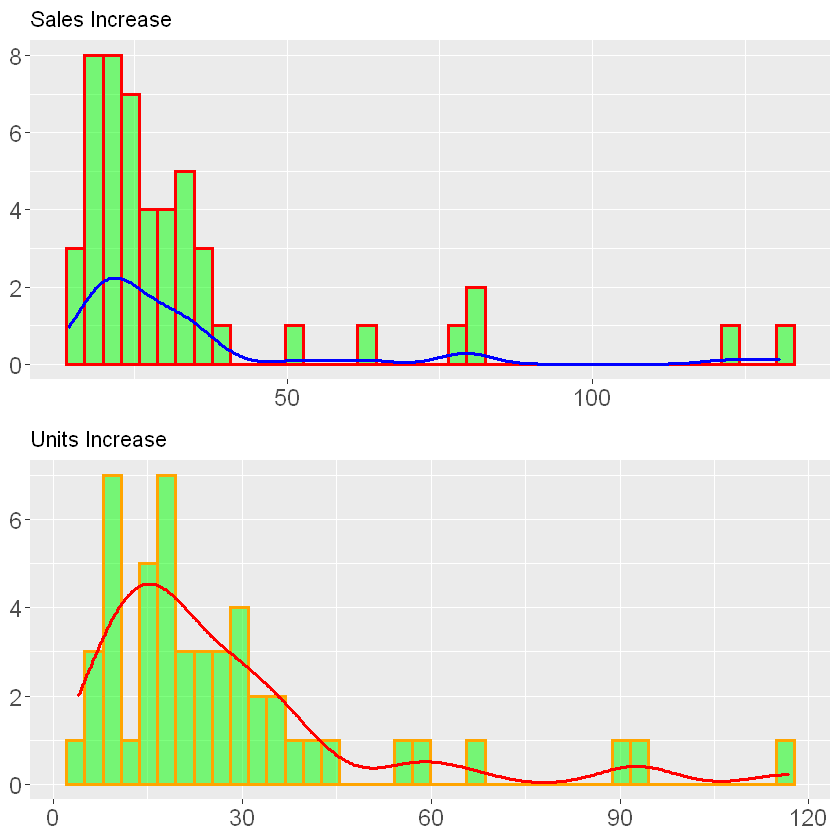

In [15]:
grid.arrange(graph3,graph4)

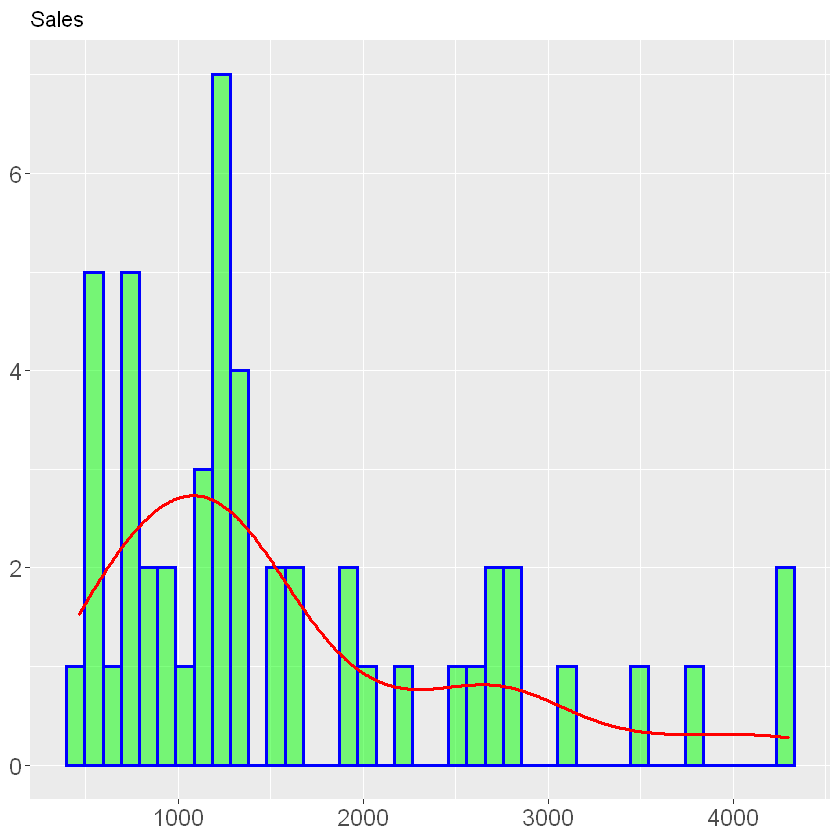

In [16]:
# Plot Unit Volume Histogram
df_future50 %>%
ggplot(aes(Unit_Volume)) +
geom_histogram(fill = "green", color = "blue", size=1,alpha = 0.5, bins = 40, boundary = 5) +
geom_density(aes(y = ..count..*100), color="red", size=1) +
labs(title = "Sales", x=NULL, y=NULL) +
theme(axis.text.x = element_text(size = 14),
     axis.text.y = element_text(size = 14))

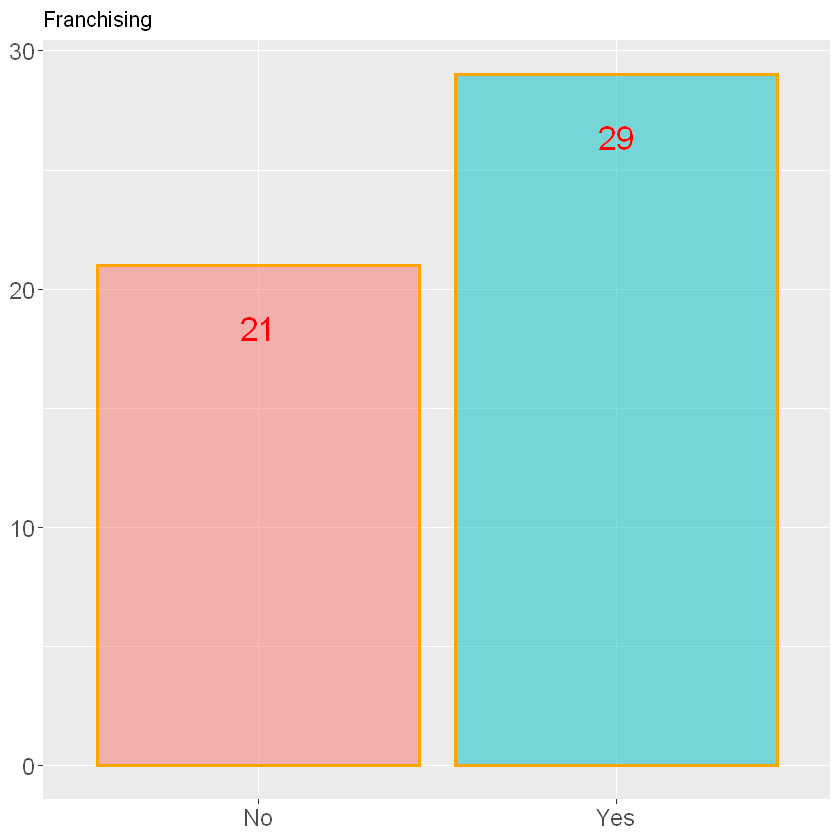

In [17]:
# Plot Franchising Status
df_future50 %>%
ggplot(aes(Franchising, fill=Franchising)) +
geom_bar(show.legend=F, alpha=.5,colour="orange",size=1) +
geom_text(stat='count', aes(label=..count..), vjust=3,size=7, colour="red") +
labs(title="Franchising", y=NULL, x=NULL) +
theme(axis.text.x = element_text(size = 14),
     axis.text.y = element_text(size = 14))

### TOP 10 RANKING FUTURE 50

1. Evergreens
2. Clean Juice
3. Slapfish
4. Clean Eatz
5. Pokeworks
6. Playa Bowls
7. The Simple Greek
8. Melt Shop
9. Creamistry
10. Joella's Hot Chicken

*Restaurants are classified according to the percentage change in their sales, along with the requirement to have opened new units in 2019.

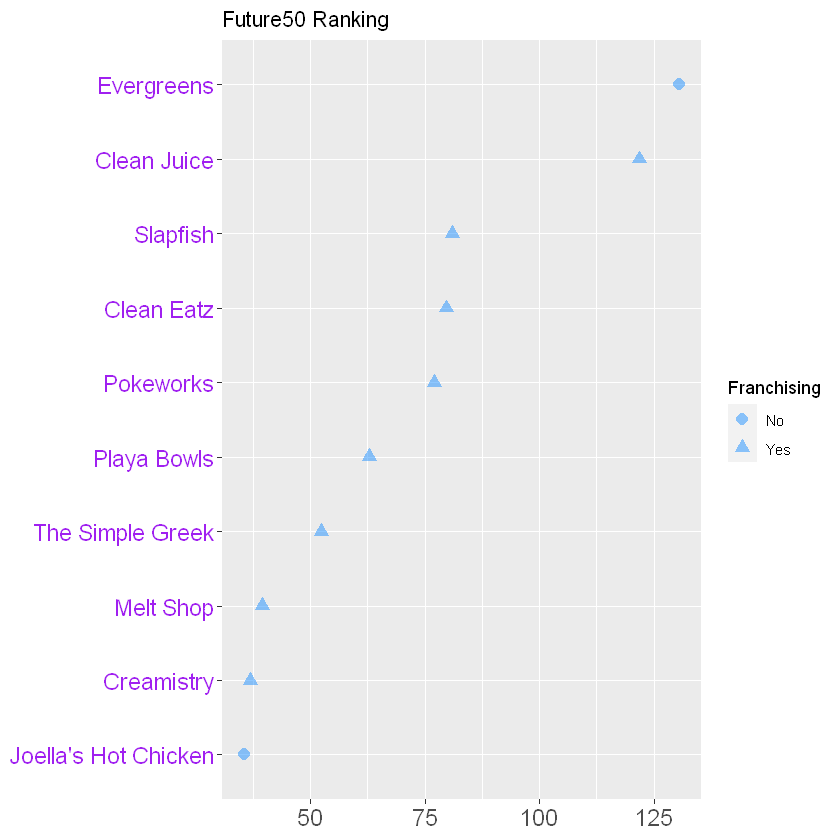

In [18]:
# Plot Top10 Future50 Ranking
df_future50 %>%
arrange(desc(YOY_Sales)) %>%
head(n=10) %>%
ggplot(aes(x = YOY_Sales, y = reorder(Restaurant, YOY_Sales), shape=Franchising)) +
geom_point(size = 3, color = "dodgerblue", alpha=.5) +
theme(axis.text.y=element_text(size=14, colour="purple"),
      axis.text.x=element_text(size=14)) +
labs(x=NULL, y=NULL, title= "Future50 Ranking")

### TOP 10 SALES IN 2019

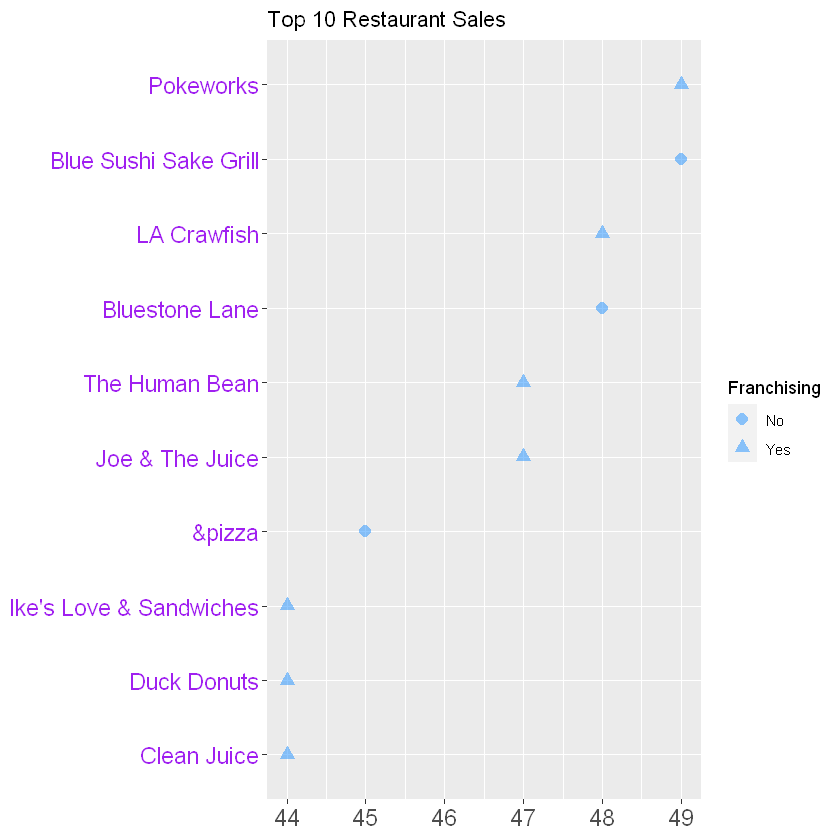

In [19]:
# Plot Top10 Restaurant Sales
df_future50 %>%
arrange(desc(Sales)) %>%
head(n=10) %>%
ggplot(aes(x = Sales, y = reorder(Restaurant, Sales), shape=Franchising)) +
geom_point(size = 3, color = "dodgerblue", alpha=.5) +
theme(axis.text.y=element_text(size=14, colour="purple"),
      axis.text.x=element_text(size=14)) +
labs(x=NULL, y=NULL, title= "Top 10 Restaurant Sales")

### TOP 10 SALES INCREASE 2018 TO 2019

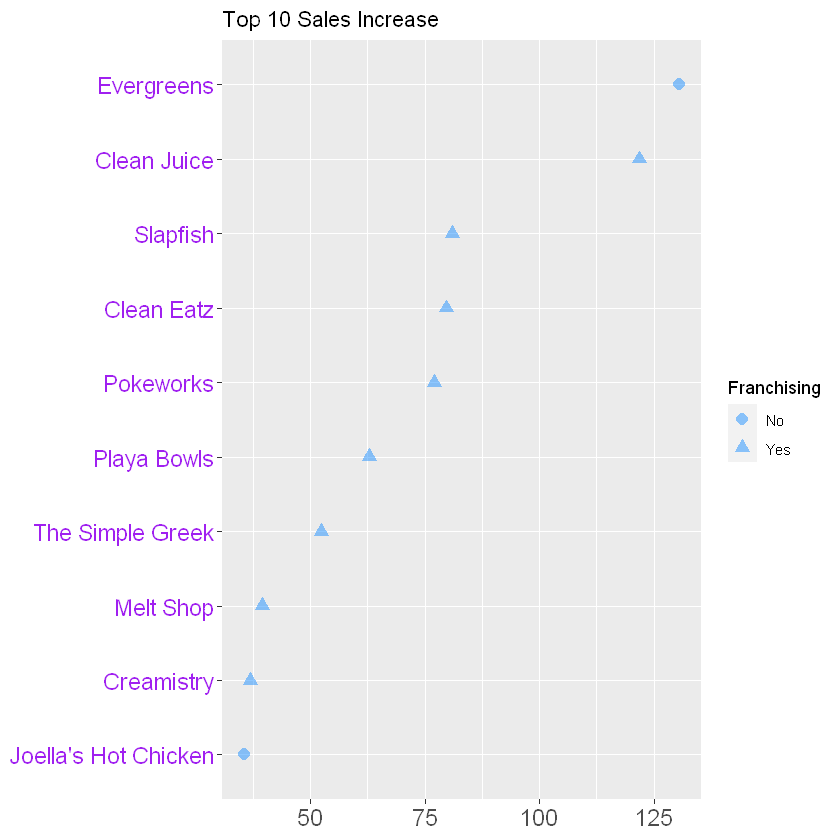

In [20]:
# Plot Top10 Sales Increase
df_future50 %>%
arrange(desc(YOY_Sales)) %>%
head(n=10) %>%
ggplot(aes(x = YOY_Sales, y = reorder(Restaurant, YOY_Sales),shape=Franchising)) +
geom_point(size = 3, color = "dodgerblue", alpha=.5) +
theme(axis.text.y=element_text(size=14, colour="purple"),
      axis.text.x=element_text(size=14)) +
labs(x=NULL, y=NULL, title= "Top 10 Sales Increase")

### TOP 10 UNITS VOLUME

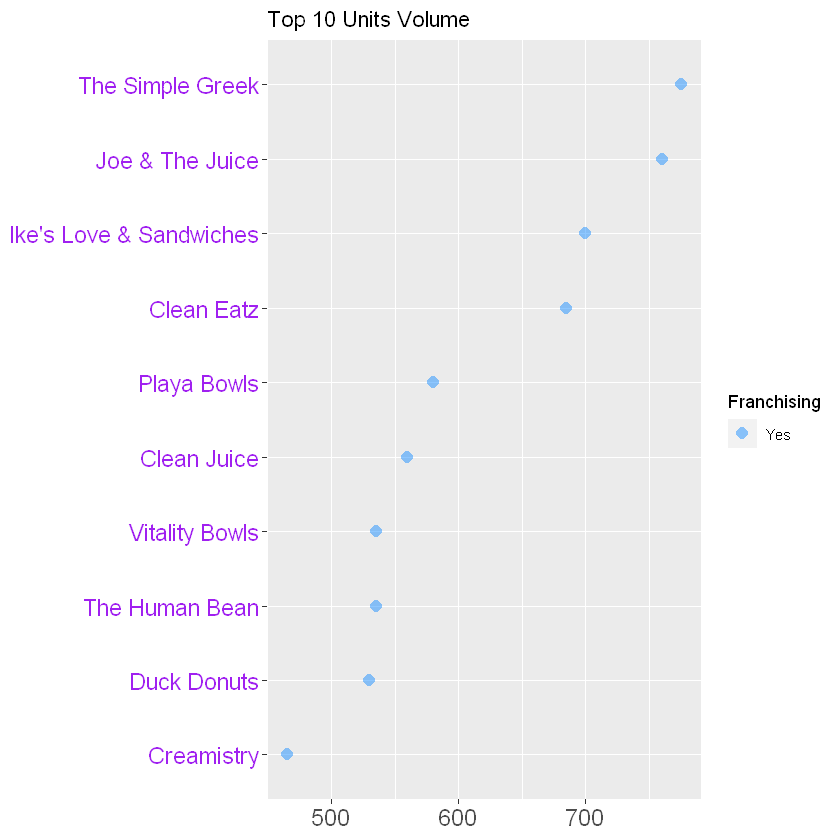

In [21]:
# Plot Top10 Units Volume
df_future50 %>%
arrange(desc(Unit_Volume)) %>%
tail(n=10) %>%
ggplot(aes(x = Unit_Volume, y = reorder(Restaurant, Unit_Volume), shape=Franchising)) +
geom_point(size = 3, color = "dodgerblue", alpha=.5) +
theme(axis.text.y=element_text(size=14, colour="purple"),
      axis.text.x=element_text(size=14)) +
labs(x=NULL, y=NULL, title= "Top 10 Units Volume")

## 3. INDEPENDENCE 100

In [22]:
# Summary of data
summary(df_independence100)

      Rank         Restaurant            Sales          Average.Check   
 Min.   :  1.00   Length:100         Min.   :11391678   Min.   : 17.00  
 1st Qu.: 25.75   Class :character   1st Qu.:14094836   1st Qu.: 39.00  
 Median : 50.50   Mode  :character   Median :17300776   Median : 65.50  
 Mean   : 50.50                      Mean   :17833434   Mean   : 69.05  
 3rd Qu.: 75.25                      3rd Qu.:19903916   3rd Qu.: 95.00  
 Max.   :100.00                      Max.   :39080335   Max.   :194.00  
     City              State            Meals.Served   
 Length:100         Length:100         Min.   : 87070  
 Class :character   Class :character   1st Qu.:189493  
 Mode  :character   Mode  :character   Median :257097  
                                       Mean   :317167  
                                       3rd Qu.:372079  
                                       Max.   :959026  

In [23]:
# View the first six lines of dataset
head(df_independence100)

,Rank,Restaurant,Sales,Average.Check,City,State,Meals.Served
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,1,Carmine's (Times Square),39080335,40,New York,N.Y.,469803
2,2,The Boathouse Orlando,35218364,43,Orlando,Fla.,820819
3,3,Old Ebbitt Grill,29104017,33,Washington,D.C.,892830
4,4,LAVO Italian Restaurant & Nightclub,26916180,90,New York,N.Y.,198500
5,5,Bryant Park Grill & Cafe,26900000,62,New York,N.Y.,403000
6,6,Gibsons Bar & Steakhouse,25409952,80,Chicago,Ill.,348567


In [24]:
# View the Last six lines of dataset
tail(df_independence100)

,Rank,Restaurant,Sales,Average.Check,City,State,Meals.Served
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
95,95,Franciscan Crab Restaurant,12218147,59,San Francisco,Calif.,240000
96,96,George's at the Cove,12194000,80,La Jolla,Calif.,250000
97,97,Le Coucou,12187523,95,New York,N.Y.,87070
98,98,Mi Vida,12032014,38,Washington,D.C.,226226
99,99,Upland,11965564,52,New York,N.Y.,171825
100,100,Virgil's Real Barbecue,11391678,27,Las Vegas,Nev.,208276


In [25]:
# Transform variables
df_independence100$City<- factor(df_independence100$City)
df_independence100$State<- factor(df_independence100$State)
df_independence100$Restaurant<- factor(df_independence100$Restaurant)

In [26]:
# Glimpse the dataset
glimpse(df_independence100)

Rows: 100
Columns: 7
$ Rank          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16...
$ Restaurant    <fct> "Carmine's (Times Square)", "The Boathouse Orlando", ...
$ Sales         <dbl> 39080335, 35218364, 29104017, 26916180, 26900000, 254...
$ Average.Check <int> 40, 43, 33, 90, 62, 80, 103, 99, 87, 107, 75, 135, 86...
$ City          <fct> New York, Orlando , Washington, New York, New York, C...
$ State         <fct> N.Y., Fla., D.C., N.Y., N.Y., Ill., Nev., Ill., N.Y.,...
$ Meals.Served  <dbl> 469803, 820819, 892830, 198500, 403000, 348567, 24605...


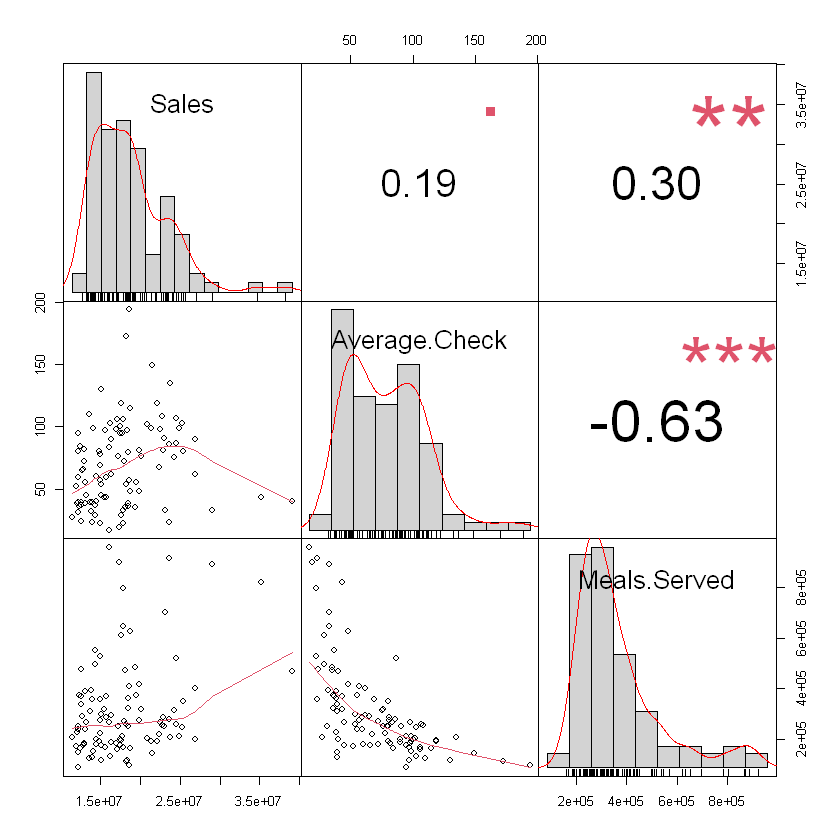

In [27]:
# Visualization the Correlation Matrix
df_independence100 %>%
select(Sales,Average.Check,Meals.Served) %>%
chart.Correlation()

In [28]:
# Sales Histogram
graph5<-df_independence100 %>%
ggplot(aes(Sales)) +
geom_histogram(fill = "green", color = "red", size=1,alpha = 0.5, bins = 40, boundary = 5) +
geom_density(aes(y=..count..*1000000),size=1,colour="slateblue1") +
  labs(title = "Sales", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(size = 14),
       axis.text.y = element_text(size = 14))

In [29]:
# Average Check Histogram
graph6<-df_independence100 %>%
ggplot(aes(Average.Check)) +
geom_histogram(fill = "lightblue", color = "orange", size=1,alpha = 0.5, bins = 40, boundary = 5) +
geom_density(aes(y=..count..*3),size=1,colour="springgreen1") +
  labs(title = "Average Check", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(size = 14),
       axis.text.y = element_text(size = 14))

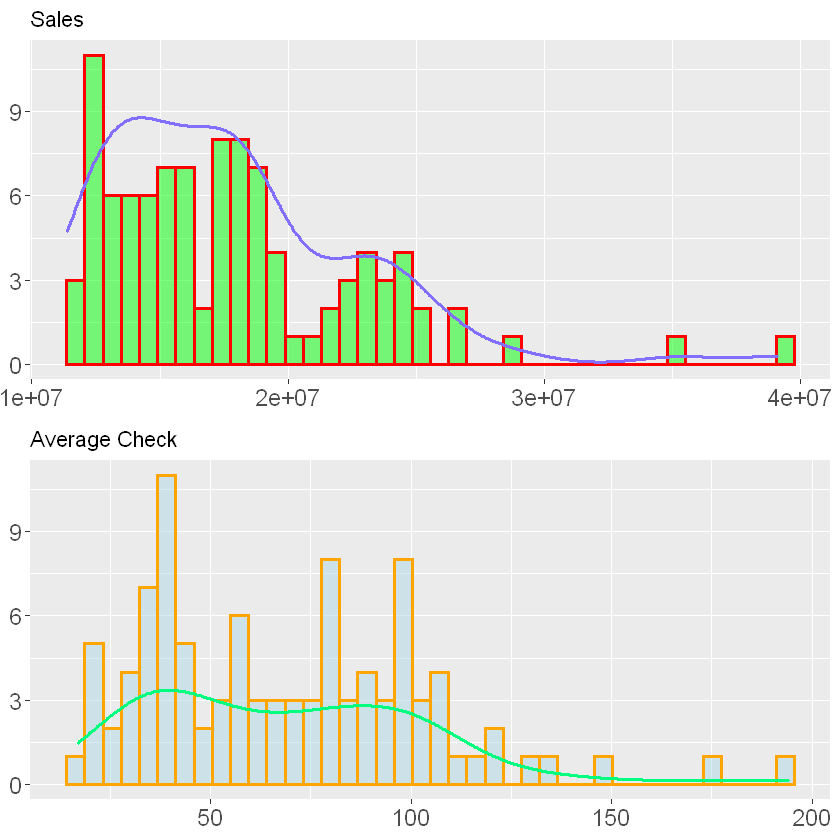

In [30]:
grid.arrange(graph5, graph6)

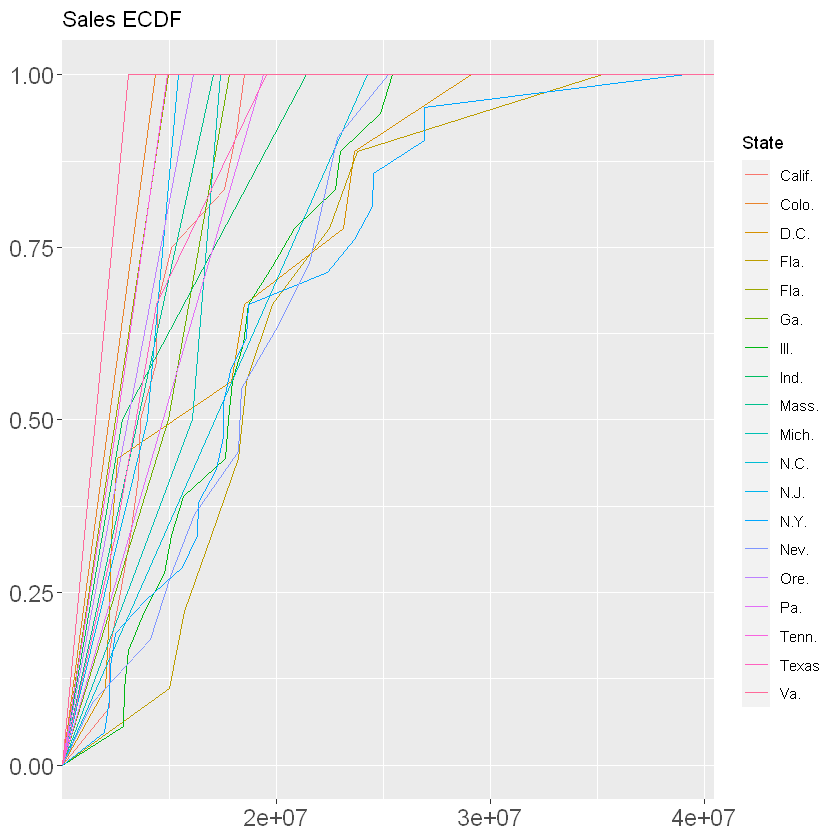

In [31]:
# Plot Sales ECDF
df_independence100 %>%
ggplot(aes(Sales, colour=State)) + 
stat_ecdf(geom = "line") +
labs(title = "Sales ECDF", x=NULL, y=NULL) +
theme(axis.text.x = element_text(size = 14),
     axis.text.y = element_text(size = 14))

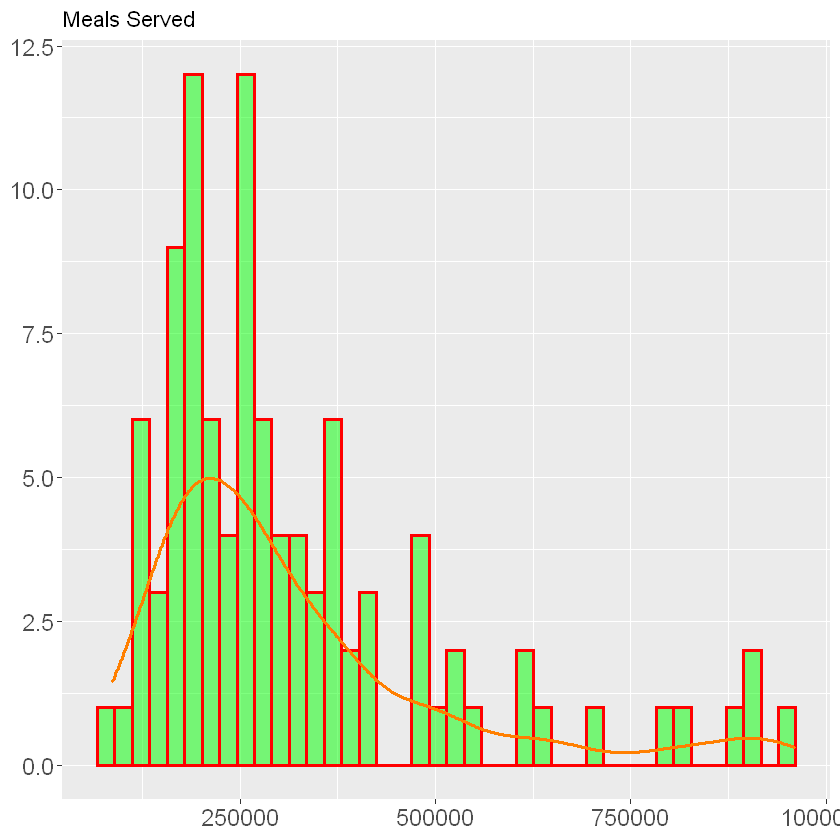

In [32]:
# Meals Served Histogram
df_independence100 %>%
ggplot(aes(Meals.Served)) +
geom_histogram(fill = "green", color = "red", size=1,alpha = 0.5, bins = 40, boundary = 5) +
geom_density(aes(y=..count..*15000),size=1,colour="darkorange1") +
  labs(title = "Meals Served", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(size = 14),
       axis.text.y = element_text(size = 14))

`geom_smooth()` using formula 'y ~ x'



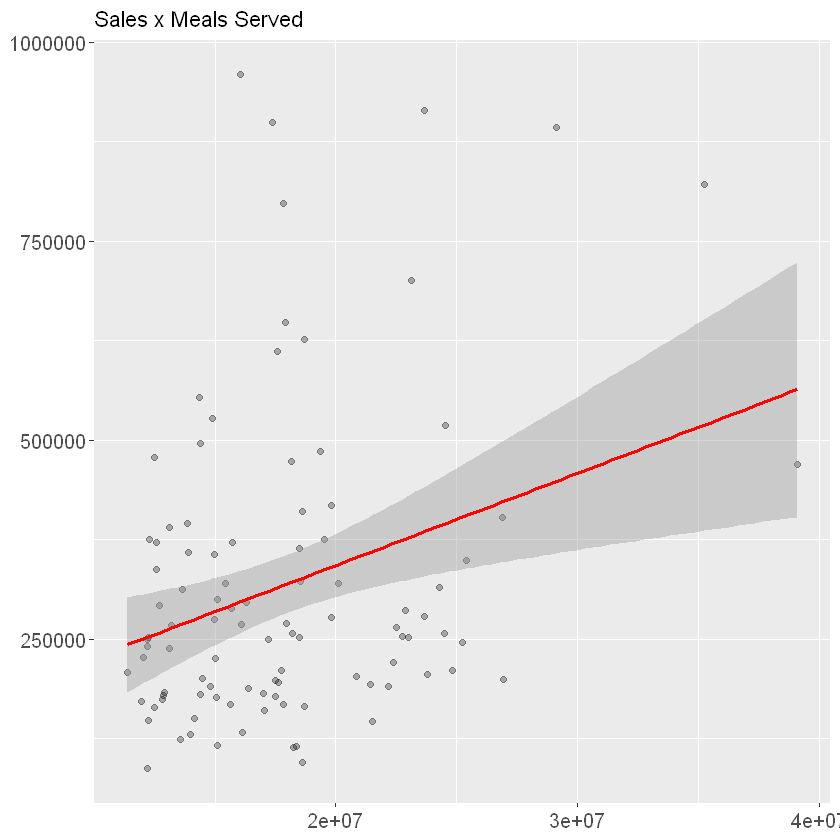

In [33]:
# Relation Sales x Meals Served
df_independence100 %>%
ggplot(aes(Sales, Meals.Served)) +
geom_point(alpha=.3) +
geom_smooth(method="lm",colour="red") +
labs(title = "Sales x Meals Served", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(size = 12),
       axis.text.y = element_text(size = 12))

### TOP 10 RANKING INDEPENDENCE 100

1. Carmine's (Times Square)	
2. The Boathouse Orlando	
3. Old Ebbitt Grill	
4. LAVO Italian Restaurant & Nightclub	
5. Bryant Park Grill & Cafe	
6. Gibsons Bar & Steakhouse	   
7. Top of the World at the STRAT	
8. Maple & Ash		
9. Balthazar	
10. Smith & Wollensky

*This classification includes independent restaurants, with a maximum of five locations, which have the highest revenues.

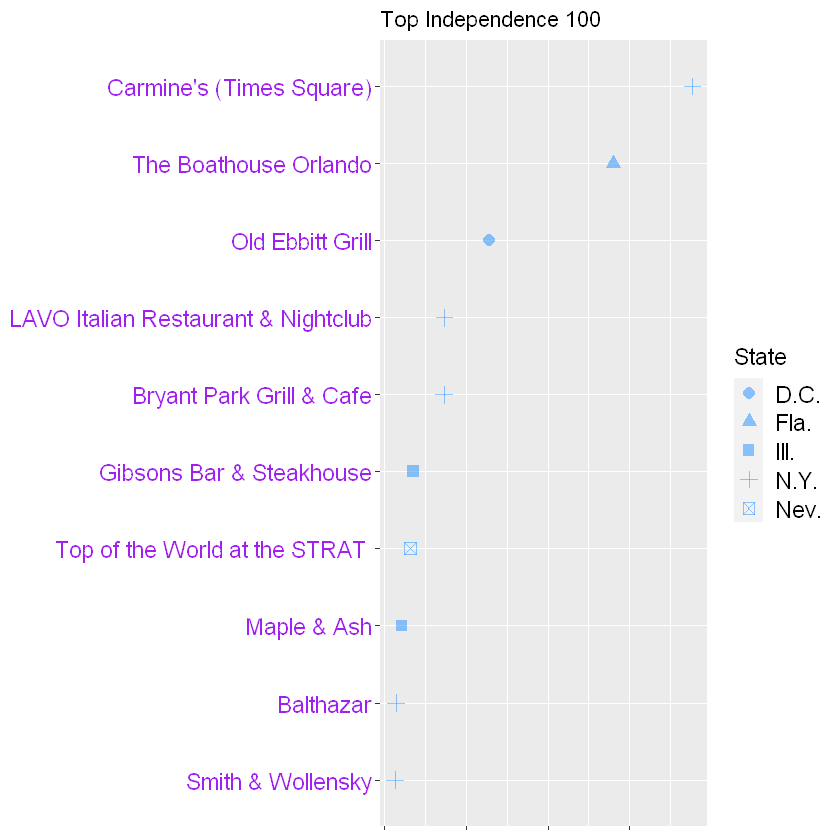

In [34]:
# Plot Top10 Independence 100 Raking
df_independence100 %>%
arrange(desc(Sales)) %>%
head(n=10) %>%
ggplot(aes(x = Sales, y = reorder(Restaurant, Sales), shape=State)) +
geom_point(size = 3, color = "dodgerblue", alpha=.5) +
theme(axis.text.y=element_text(size=14, colour="purple"),
      axis.text.x=element_blank(),
      legend.text = element_text(size=14),
     legend.title=element_text(size=14)) +
labs(x=NULL, y=NULL, title= "Top Independence 100")

### TOP 10 AVERAGE CHECK

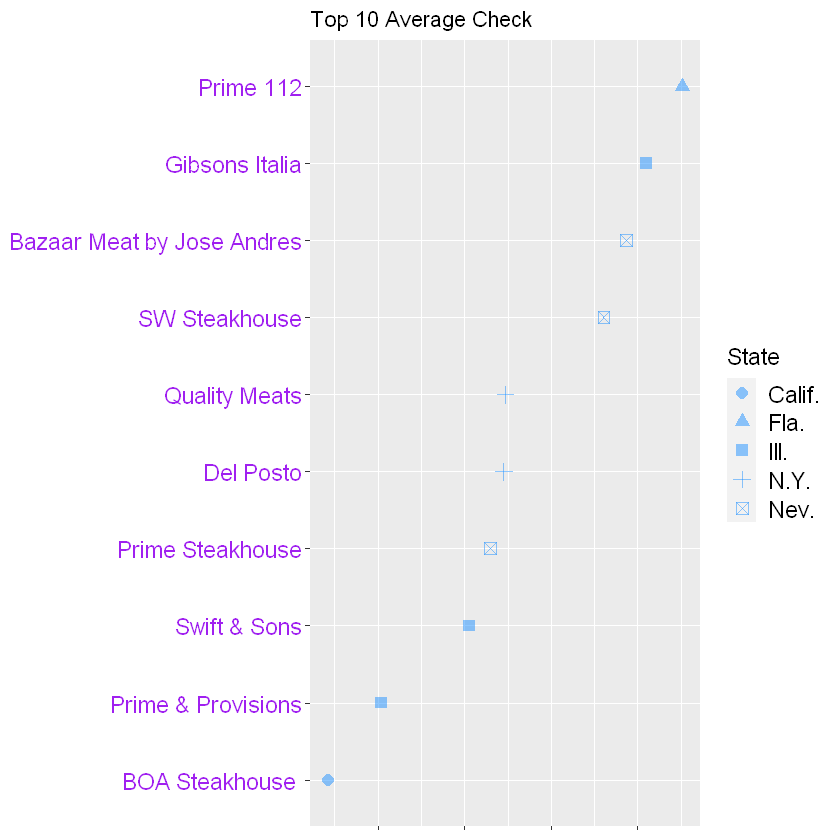

In [35]:
# Plot Top10 Average Check
df_independence100 %>%
arrange(desc(Average.Check)) %>%
head(n=10) %>%
ggplot(aes(x = Sales, y = reorder(Restaurant, Sales), shape=State)) +
geom_point(size = 3, color = "dodgerblue", alpha=.5) +
theme(axis.text.y=element_text(size=14, colour="purple"),
      axis.text.x=element_blank(),
      legend.text = element_text(size=14),
     legend.title=element_text(size=14)) +
labs(x=NULL, y=NULL, title= "Top 10 Average Check")

## 4. TOP 250

In [36]:
# Summary of data
summary(df_top250)

      Rank         Restaurant          Content              Sales        
 Min.   :  1.00   Length:250         Length:250         Min.   :  126.0  
 1st Qu.: 63.25   Class :character   Class :character   1st Qu.:  181.0  
 Median :125.50   Mode  :character   Mode  :character   Median :  330.0  
 Mean   :125.50                                         Mean   : 1242.7  
 3rd Qu.:187.75                                         3rd Qu.:  724.8  
 Max.   :250.00                                         Max.   :40412.0  
  YOY_Sales             Units          YOY_Units         Headquarters      
 Length:250         Min.   :   13.0   Length:250         Length:250        
 Class :character   1st Qu.:   85.0   Class :character   Class :character  
 Mode  :character   Median :  207.0   Mode  :character   Mode  :character  
                    Mean   :  850.1                                        
                    3rd Qu.:  555.2                                        
                    Max.  

In [37]:
# View first six lines of dataset
head(df_top250)

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,1,McDonald's,NA,40412,4.9%,13846,-0.5%,NA,Quick Service & Burger
2,2,Starbucks,NA,21380,8.6%,15049,3.0%,NA,Quick Service & Coffee Cafe
3,3,Chick-fil-A,"While Popeyes got a lot of the chicken buzz in 2019, Chick-fil-A had a busy year in its own right. On top of passing Taco Bell and Subway to become the nation's third-largest chain, it introduced dine-in mobile ordering, eliminated antibiotics from its chicken and added its first new permanent menu item in three years: mac and cheese.",11320,13.0%,2470,5.0%,NA,Quick Service & Chicken
4,4,Taco Bell,NA,11293,9.0%,6766,2.7%,NA,Quick Service & Mexican
5,5,Burger King,NA,10204,2.7%,7346,0.2%,NA,Quick Service & Burger
6,6,Subway,NA,10200,-2.0%,23801,-4.0%,NA,Quick Service & Sandwich


In [38]:
# View last six lines of dataset
tail(df_top250)

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
245,245,Gyu-Kaku,NA,129,18.6%,52,8.3%,NA,Asian
246,246,Rainforest Cafe,NA,129,-10.4%,18,-5.3%,NA,Varied Menu
247,247,PDQ,NA,127,-5.5%,56,-11.1%,NA,Chicken
248,248,Lupe Tortilla,NA,127,12.1%,25,8.7%,NA,Mexican
249,249,Cook-Out Restaurant,NA,126,10.1%,270,7.1%,NA,Burger
250,250,Jollibee,NA,126,15.2%,40,11.1%,NA,Chicken


In [39]:
# Transform Variables
df_top250$Restaurant<- factor(df_top250$Restaurant)
df_top250$Segment_Category<- factor(df_top250$Segment_Category)
df_top250$Headquarters<- factor(df_top250$Headquarters)
df_top250$YOY_Sales<-as.numeric(str_sub(df_top250$YOY_Sales, end=-2))
df_top250$YOY_Units<-as.numeric(str_sub(df_top250$YOY_Units, end=-2))


In [40]:
# Glimpse dataset
glimpse(df_top250)

Rows: 250
Columns: 9
$ Rank             <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,...
$ Restaurant       <fct> McDonald's, Starbucks, Chick-fil-A, Taco Bell, Bur...
$ Content          <chr> NA, NA, "While Popeyes got a lot of the chicken bu...
$ Sales            <int> 40412, 21380, 11320, 11293, 10204, 10200, 9762, 92...
$ YOY_Sales        <dbl> 4.9, 8.6, 13.0, 9.0, 2.7, -2.0, 4.2, 5.0, 6.9, 4.0...
$ Units            <int> 13846, 15049, 2470, 6766, 7346, 23801, 5852, 9630,...
$ YOY_Units        <dbl> -0.5, 3.0, 5.0, 2.7, 0.2, -4.0, 0.7, 2.2, 4.3, 3.2...
$ Headquarters     <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ Segment_Category <fct> Quick Service & Burger, Quick Service & Coffee Caf...


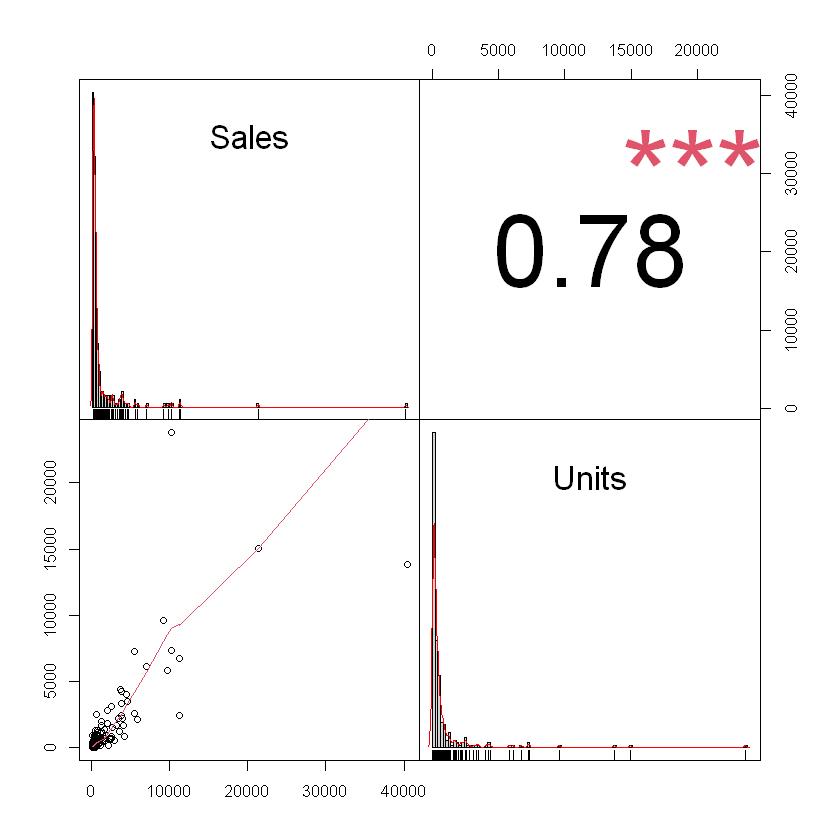

In [41]:
# Visualization the Correlation Matrix
df_top250 %>%
select(Sales, Units) %>%
chart.Correlation()

In [42]:
# Plot Sales Histogram
graph10<-df_top250 %>%
ggplot(aes(Sales)) +
geom_histogram(fill = "green", color = "red", size=1,alpha = 0.5, bins = 40, boundary = 5) +
labs(title = "Sales", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(size = 14),
       axis.text.y = element_text(size = 14))

In [43]:
# Plot Units Histogram
graph11<-df_top250 %>%
ggplot(aes(Units)) +
geom_histogram(fill = "lightgreen", color = "lightblue", size=1,alpha = 0.5, bins = 40, boundary = 5) +
labs(title = "Units", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(size = 14),
       axis.text.y = element_text(size = 14))

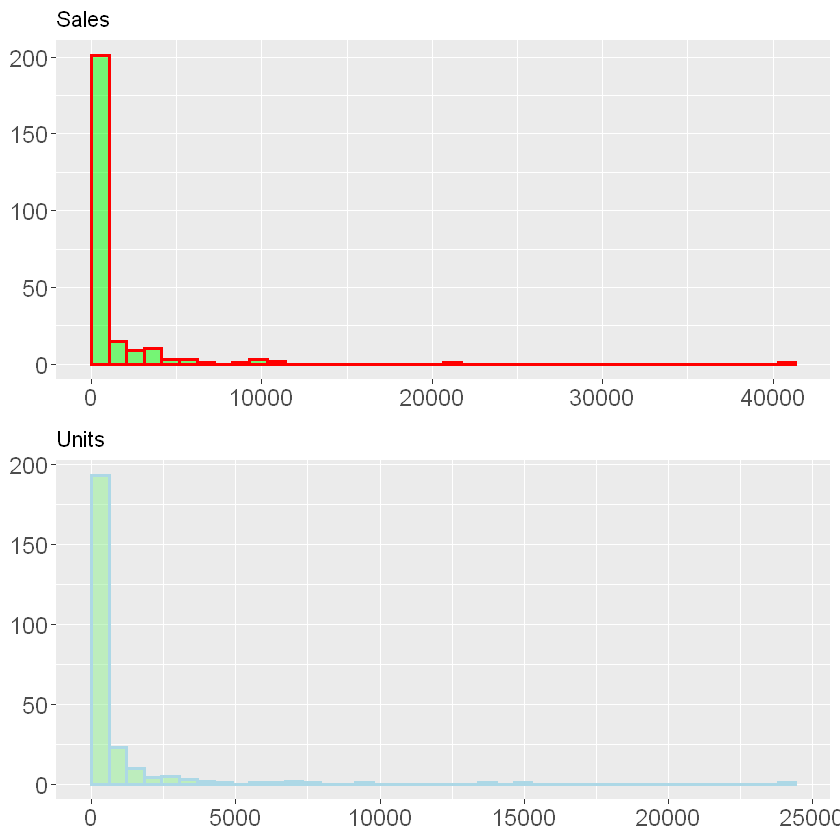

In [44]:
grid.arrange(graph10, graph11)

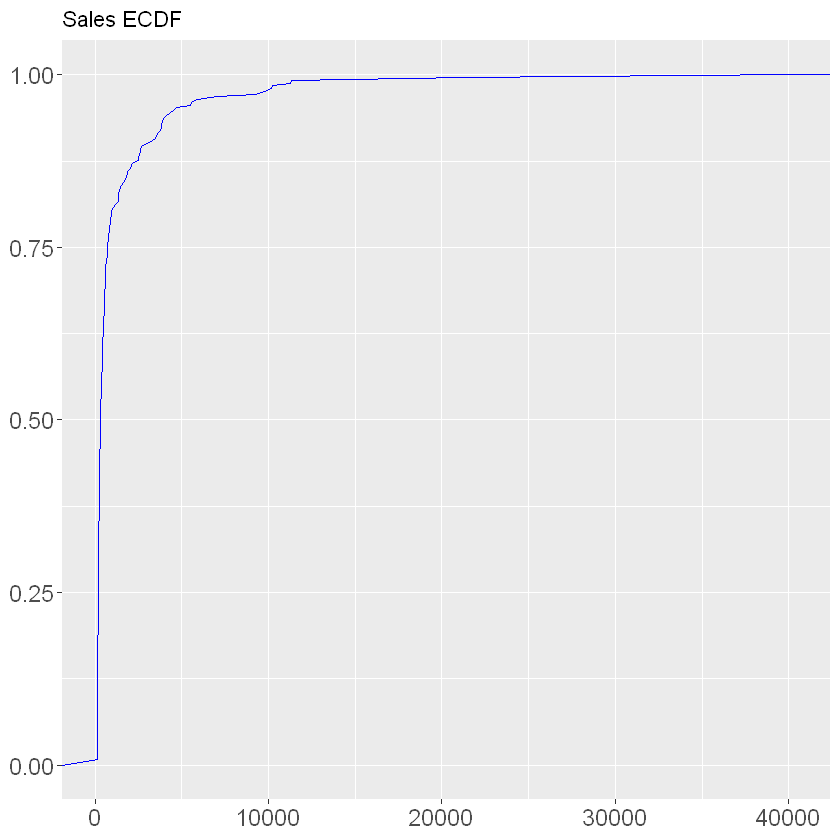

In [45]:
# Plot Sales ECDF
df_top250 %>%
ggplot(aes(Sales)) + 
stat_ecdf(geom = "line", colour="blue") +
labs(title = "Sales ECDF", x=NULL, y=NULL) +
theme(axis.text.x = element_text(size = 14),
     axis.text.y = element_text(size = 14))

In [46]:
# Plot YOY Sales Histogram
graph12<-df_top250 %>%
ggplot(aes(YOY_Sales)) +
geom_histogram(fill = "green", color = "blue", size=1,alpha = 0.5, bins = 40, boundary = 5) +
geom_density(aes(y=..count..),size=1,colour="darkorange1") +
labs(title = "YOY Sales", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(size = 14),
       axis.text.y = element_text(size = 14))

In [47]:
# Plot YOY Units Histogram
graph13<-df_top250 %>%
ggplot(aes(YOY_Units)) +
geom_histogram(fill = "lightgreen", color = "lightblue", size=1,alpha = 0.5, bins = 40, boundary = 5) +
geom_density(aes(y=..count..),size=1,colour="darkorange1") +
labs(title = "YOY Units", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(size = 14),
       axis.text.y = element_text(size = 14))

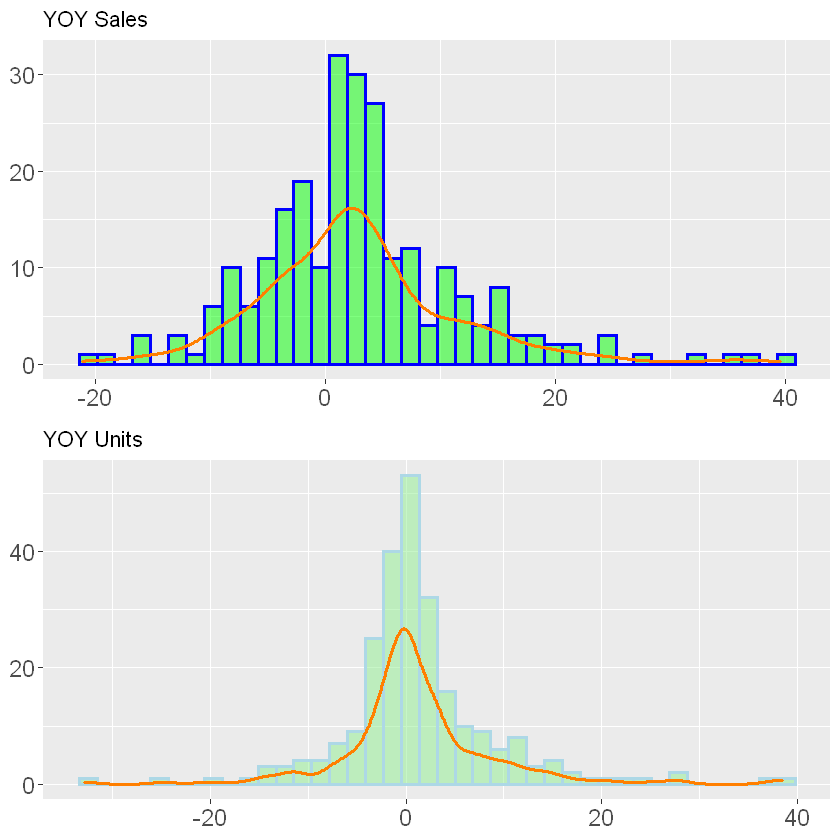

In [48]:
grid.arrange(graph12,graph13)

### TOP 10 RANKING TOP 250

1. McDonald's
2. Starbucks
3. Chick-fil-A
4. Taco Bell
5. Burger King
6. Subway
7. Wendy's
8. Dunkin'
9. Domino's
10. Panera Bread

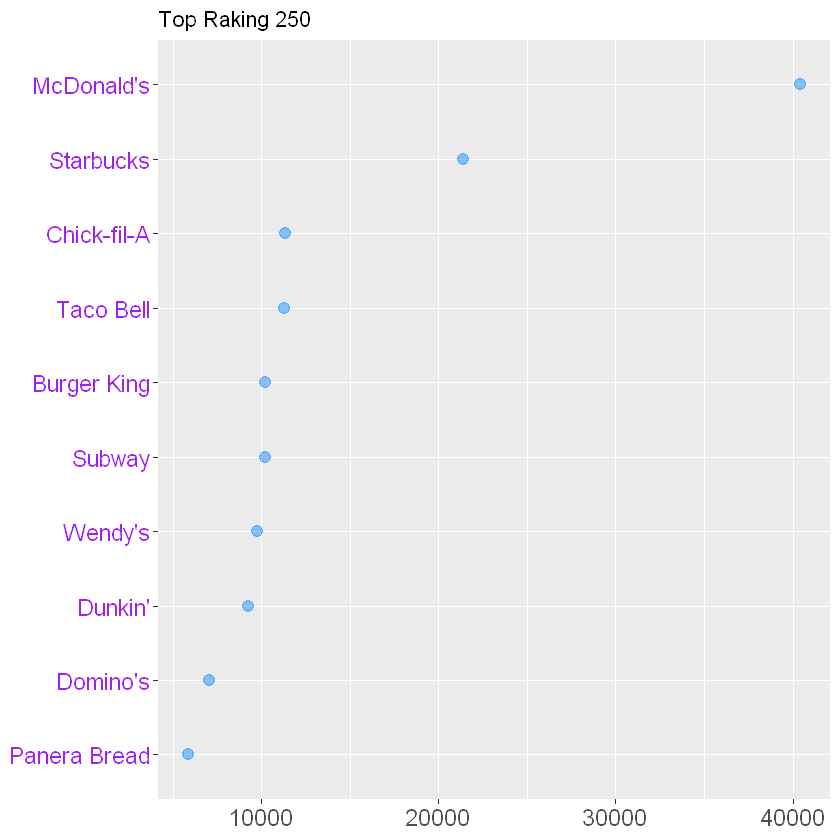

In [49]:
# Plot Top10 Ranking
df_top250 %>%
arrange(desc(Sales)) %>%
head(n=10) %>%
ggplot(aes(x = Sales, y = reorder(Restaurant, Sales))) +
geom_point(size = 3, color = "dodgerblue", alpha=.5) +
theme(axis.text.y=element_text(size=14, colour="purple"),
      axis.text.x=element_text(size=14)) +
labs(x=NULL, y=NULL, title= "Top Raking 250")

### TOP 10 UNITS

1. Subway	
2. Starbucks	
3. McDonald's	
4. Dunkin'	
5. Burger King	
6. Pizza Hut	
7. Taco Bell	
8. Domino's	
9. Wendy's	
10. Dairy Queen

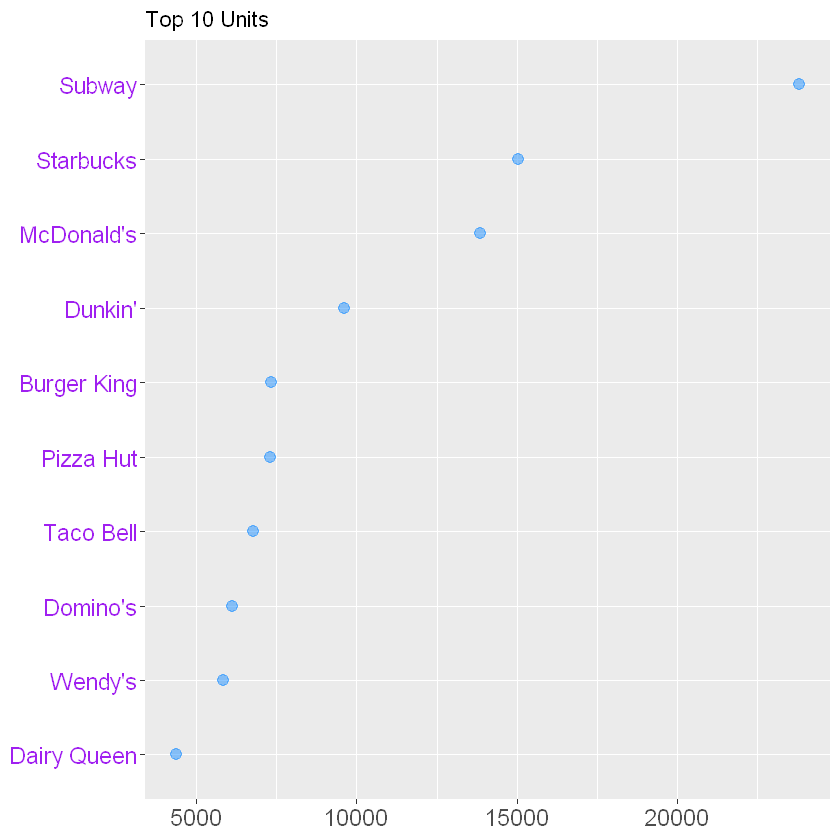

In [50]:
# Plot Top10 Restaurant Units
df_top250 %>%
arrange(desc(Units)) %>%
head(n=10) %>%
ggplot(aes(x = Units, y = reorder(Restaurant, Units))) +
geom_point(size = 3, color = "dodgerblue", alpha=.5) +
theme(axis.text.y=element_text(size=14, colour="purple"),
      axis.text.x=element_text(size=14)) +
labs(x=NULL, y=NULL, title= "Top 10 Units")

DIEGO RAMIREZ <br>
daarfarias@hotmail.com <br>
https://github.com/daarfarias <br>
Dataset: https://www.kaggle.com/michau96/restaurant-business-rankings-2020